## Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

## Load the data

In [2]:
%pip install pandas

  Using cached pandas-2.2.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached numpy-2.2.4-cp310-cp310-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached pandas-2.2.3-cp310-cp310-macosx_11_0_arm64.whl (11.3 MB)
Using cached numpy-2.2.4-cp310-cp310-macosx_14_0_arm64.whl (5.4 MB)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Load the two CSV files
old_df = pd.read_csv("../data/la_liga_10_seasons.csv")    # CSV ending at 2024-08-18
new_df = pd.read_csv("../data/extr_la_liga_10_seasons.csv")    # CSV ending at 2025-03-15

# Concatenate the two DataFrames
combined_df = pd.concat([old_df, new_df], ignore_index=True)

# (Optional) If you need to sort by a date column, ensure the column is parsed as dates:
combined_df["date"] = pd.to_datetime(combined_df["date"])
combined_df.sort_values("date", inplace=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv("combined_la_liga.csv", index=False)

In [2]:
# Load the data
file_path = "../data/la_liga_10_seasons.csv"  # Adjust path as needed
matches = pd.read_csv(file_path, index_col=0)

## Data Preprocessing

In [3]:
matches.head()

,time,comp,round,day,venue,result,gf,ga,opponent,xg,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
date,,,,,,,,,,,,,,,,,,,,,
2024-08-18,21:30,La Liga,Matchweek 1,Sun,Away,D,1.0,1.0,Mallorca,0.6,...,Match Report,NaN,13.0,5.0,21.3,0.0,0,0,2025,Real Madrid
2024-08-25,17:00,La Liga,Matchweek 2,Sun,Home,W,3.0,0.0,Valladolid,2.1,...,Match Report,NaN,17.0,9.0,17.2,1.0,0,0,2025,Real Madrid
2024-08-29,20:30,La Liga,Matchweek 3,Thu,Away,D,1.0,1.0,Las Palmas,2.5,...,Match Report,NaN,24.0,7.0,18.0,1.0,1,1,2025,Real Madrid
2024-09-01,21:30,La Liga,Matchweek 4,Sun,Home,W,2.0,0.0,Betis,2.4,...,Match Report,NaN,21.0,6.0,16.3,0.0,1,1,2025,Real Madrid
2024-09-14,21:00,La Liga,Matchweek 5,Sat,Away,W,2.0,0.0,Real Sociedad,2.3,...,Match Report,NaN,14.0,4.0,19.4,1.0,2,2,2025,Real Madrid


In [4]:
matches.shape

(4924, 27)

In [5]:
matches["team"].value_counts()

team
Real Madrid        247
Barcelona          247
Athletic Club      247
Real Betis         246
Valencia           246
Getafe             246
Atletico Madrid    246
Celta Vigo         246
Sevilla            246
Villarreal         246
Real Sociedad      246
Alaves             208
Osasuna            208
Mallorca           171
Rayo Vallecano     170
Espanyol           170
Valladolid         170
Cadiz              152
Granada            152
Levante            152
Girona             132
Elche              114
Eibar              114
Leganes             94
Almeria             76
Huesca              76
Las Palmas          56
Name: count, dtype: int64

In [6]:
matches["round"].value_counts()


round
Matchweek 1     140
Matchweek 12    140
Matchweek 17    140
Matchweek 16    140
Matchweek 2     140
Matchweek 15    140
Matchweek 14    140
Matchweek 13    140
Matchweek 11    140
Matchweek 10    140
Matchweek 9     140
Matchweek 8     140
Matchweek 7     140
Matchweek 6     140
Matchweek 5     140
Matchweek 4     140
Matchweek 3     140
Matchweek 18    140
Matchweek 19    124
Matchweek 29    120
Matchweek 37    120
Matchweek 36    120
Matchweek 35    120
Matchweek 34    120
Matchweek 33    120
Matchweek 32    120
Matchweek 31    120
Matchweek 30    120
Matchweek 21    120
Matchweek 28    120
Matchweek 27    120
Matchweek 26    120
Matchweek 25    120
Matchweek 24    120
Matchweek 23    120
Matchweek 20    120
Matchweek 22    120
Matchweek 38    120
Name: count, dtype: int64

In [7]:
matches.dtypes

time              object
comp              object
round             object
day               object
venue             object
result            object
gf               float64
ga               float64
opponent          object
xg               float64
xga              float64
poss             float64
attendance       float64
captain           object
formation         object
opp formation     object
referee           object
match report      object
notes            float64
sh               float64
sot              float64
dist             float64
fk               float64
pk                 int64
pkatt              int64
season             int64
team              object
dtype: object

In [8]:
matches.reset_index(inplace=True)  # Moves the index to a column
matches["date"] = pd.to_datetime(matches["date"])  # Convert to datetime

In [9]:
matches.dtypes

date             datetime64[ns]
time                     object
comp                     object
round                    object
day                      object
venue                    object
result                   object
gf                      float64
ga                      float64
opponent                 object
xg                      float64
xga                     float64
poss                    float64
attendance              float64
captain                  object
formation                object
opp formation            object
referee                  object
match report             object
notes                   float64
sh                      float64
sot                     float64
dist                    float64
fk                      float64
pk                        int64
pkatt                     int64
season                    int64
team                     object
dtype: object

In [10]:
matches["venue_code"] = matches["venue"].astype('category').cat.codes
# matches


In [11]:
matches['opp_code'] = matches['opponent'].astype('category').cat.codes
# Extract the mapping for opponents
opponent_mapping = dict(enumerate(matches['opponent'].astype('category').cat.categories))
# Display the mapping
print("Opponent to Code Mapping:")
for code, opponent in opponent_mapping.items():
    print(f"{code}: {opponent}")

matches['team'] = matches['team'].astype('category').cat.codes
team_mapping = dict(enumerate(matches['team'].astype('category').cat.categories))
# Display the mapping
print("Team to Code Mapping:")
for code, team in team_mapping.items():
    print(f"{code}: {team}")

Opponent to Code Mapping:
0: Alavés
1: Almería
2: Athletic Club
3: Atlético Madrid
4: Barcelona
5: Betis
6: Celta Vigo
7: Cádiz
8: Eibar
9: Elche
10: Espanyol
11: Getafe
12: Girona
13: Granada
14: Huesca
15: Las Palmas
16: Leganés
17: Levante
18: Mallorca
19: Osasuna
20: Rayo Vallecano
21: Real Madrid
22: Real Sociedad
23: Sevilla
24: Valencia
25: Valladolid
26: Villarreal
Team to Code Mapping:
0: 0
1: 1
2: 2
3: 3
4: 4
5: 5
6: 6
7: 7
8: 8
9: 9
10: 10
11: 11
12: 12
13: 13
14: 14
15: 15
16: 16
17: 17
18: 18
19: 19
20: 20
21: 21
22: 22
23: 23
24: 24
25: 25
26: 26


In [12]:
matches['hour'] = matches['time'].str.replace(':.+','',regex=True).astype('int')
# matches

In [13]:
matches['day_code'] = matches['date'].dt.dayofweek
# matches

In [14]:
# Map results to numerical values: W = 2, D = 1, L = 0
matches['target'] = matches['result'].map({'W': 2, 'D': 1, 'L': 0})
# matches

In [15]:
# train = matches[matches['date'] < '2023-06-04'] # The last match of the real madrid 2023 season
# test = matches[matches['date'] > '2023-06-04']

In [16]:
def rolling_average(group, cols, new_cols):
    # Sort by date to ensure proper rolling calculations
    group = group.sort_values('date')

    # Calculate rolling averages for the specified columns
    rolling_stats = group[cols].rolling(5, closed='left').mean()

    # Assign the rolling averages to new columns in the DataFrame
    for col, new_col in zip(cols, new_cols):
        group[new_col] = rolling_stats[col]

    # Drop rows with NaN values (occurs for the first few rows before the rolling window is complete)
    group = group.dropna(subset=new_cols)

    return group

In [17]:
# List of columns for which to calculate rolling averages
cols = ['gf', 'ga', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']

# Names of the new rolling average columns
new_cols = [f'{c}_rolling' for c in cols]

In [18]:
# Group by team and apply rolling averages
matches_rolling = matches.groupby('team').apply(lambda x: rolling_average(x, cols, new_cols))
# Reset index after applying groupby to flatten the DataFrame
matches_rolling = matches_rolling.droplevel('team')
matches_rolling.reset_index(drop=True, inplace=True)

/var/folders/rc/j294rj094lb9j6zz6fcghj7m0000gn/T/ipykernel_9464/3353998929.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_rolling = matches.groupby('team').apply(lambda x: rolling_average(x, cols, new_cols))


In [19]:
print(matches_rolling.columns)

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'opp formation', 'referee', 'match report', 'notes', 'sh', 'sot',
       'dist', 'fk', 'pk', 'pkatt', 'season', 'team', 'venue_code', 'opp_code',
       'hour', 'day_code', 'target', 'gf_rolling', 'ga_rolling', 'sh_rolling',
       'sot_rolling', 'dist_rolling', 'fk_rolling', 'pk_rolling',
       'pkatt_rolling'],
      dtype='object')


In [20]:
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2018-09-27,20:00,La Liga,Matchweek 6,Thu,Home,D,1.0,1.0,Getafe,...,3,1,1.6,1.0,9.6,4.0,19.02,0.2,0.0,0.0
1,2018-09-30,18:30,La Liga,Matchweek 7,Sun,Away,L,1.0,2.0,Levante,...,6,0,1.8,0.6,11.8,4.2,20.26,0.2,0.0,0.2
2,2018-10-06,18:30,La Liga,Matchweek 8,Sat,Home,W,1.0,0.0,Real Madrid,...,5,2,2.0,1.0,11.2,3.8,19.60,0.4,0.0,0.2
3,2018-10-19,21:00,La Liga,Matchweek 9,Fri,Away,W,1.0,0.0,Celta Vigo,...,4,2,1.8,0.8,11.2,3.6,21.32,0.4,0.0,0.2
4,2018-10-28,18:30,La Liga,Matchweek 10,Sun,Home,W,2.0,1.0,Villarreal,...,6,2,1.8,0.8,11.0,3.2,21.44,0.8,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,2024-12-01,14:00,La Liga,Matchweek 15,Sun,Home,D,2.0,2.0,Girona,...,6,1,1.6,1.2,14.0,4.4,17.00,0.4,0.4,0.4
4775,2024-12-08,16:15,La Liga,Matchweek 16,Sun,Away,L,0.0,2.0,Athletic Club,...,6,0,2.0,1.2,14.2,5.0,16.48,0.2,0.4,0.4
4776,2024-12-15,18:30,La Liga,Matchweek 17,Sun,Home,L,1.0,2.0,Betis,...,6,0,1.8,1.4,14.4,4.4,16.70,0.2,0.4,0.4
4777,2024-12-18,21:30,La Liga,Matchweek 12,Wed,Home,D,1.0,1.0,Rayo Vallecano,...,2,1,1.6,1.6,13.6,3.2,16.40,0.2,0.4,0.4


In [21]:
# List of columns to keep
columns_to_keep = ['date', 'venue_code', 'opp_code', 'day_code', 'hour',
                   'gf_rolling', 'ga_rolling', 'sh_rolling', 'sot_rolling',
                   'dist_rolling', 'fk_rolling', 'pk_rolling', 'pkatt_rolling', 'team','target']

# Drop all other columns
matches_rolling = matches_rolling[columns_to_keep]
matches_rolling

,date,venue_code,opp_code,day_code,hour,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling,team,target
0,2018-09-27,1,11,3,20,1.6,1.0,9.6,4.0,19.02,0.2,0.0,0.0,0,1
1,2018-09-30,0,17,6,18,1.8,0.6,11.8,4.2,20.26,0.2,0.0,0.2,0,0
2,2018-10-06,1,21,5,18,2.0,1.0,11.2,3.8,19.60,0.4,0.0,0.2,0,2
3,2018-10-19,0,6,4,21,1.8,0.8,11.2,3.6,21.32,0.4,0.0,0.2,0,2
4,2018-10-28,1,26,6,18,1.8,0.8,11.0,3.2,21.44,0.8,0.0,0.2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,2024-12-01,1,12,6,14,1.6,1.2,14.0,4.4,17.00,0.4,0.4,0.4,26,1
4775,2024-12-08,0,2,6,16,2.0,1.2,14.2,5.0,16.48,0.2,0.4,0.4,26,0
4776,2024-12-15,1,5,6,18,1.8,1.4,14.4,4.4,16.70,0.2,0.4,0.4,26,0
4777,2024-12-18,1,20,2,21,1.6,1.6,13.6,3.2,16.40,0.2,0.4,0.4,26,1


In [22]:
# Step 1: Create rolling averages for each team (already done as matches_rolling)
matches_rolling = matches.groupby('team').apply(
    lambda x: rolling_average(x, cols, new_cols)
).droplevel('team').reset_index(drop=True)

# Step 2: Merge opponent rolling averages
# Join the rolling averages of the opponent into the main DataFrame
opponent_rolling = matches_rolling[['team', 'date'] + new_cols].rename(
    columns={col: f'opp_{col}' for col in new_cols}
)

# Merge the opponent's rolling averages based on the match date and opponent code
matches_with_opponent = matches_rolling.merge(
    opponent_rolling,
    left_on=['opp_code', 'date'],
    right_on=['team', 'date'],
    suffixes=('', '_opp'),
    how='left'
)

# Drop the redundant 'team_opp' column created by the merge
matches_with_opponent = matches_with_opponent.drop(columns=['team_opp'])

/var/folders/rc/j294rj094lb9j6zz6fcghj7m0000gn/T/ipykernel_9464/2359038141.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_rolling = matches.groupby('team').apply(


In [23]:
matches_with_opponent.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'opp formation', 'referee', 'match report', 'notes', 'sh', 'sot',
       'dist', 'fk', 'pk', 'pkatt', 'season', 'team', 'venue_code', 'opp_code',
       'hour', 'day_code', 'target', 'gf_rolling', 'ga_rolling', 'sh_rolling',
       'sot_rolling', 'dist_rolling', 'fk_rolling', 'pk_rolling',
       'pkatt_rolling', 'opp_gf_rolling', 'opp_ga_rolling', 'opp_sh_rolling',
       'opp_sot_rolling', 'opp_dist_rolling', 'opp_fk_rolling',
       'opp_pk_rolling', 'opp_pkatt_rolling'],
      dtype='object')

In [24]:
columns_to_keep = ['date', 'venue_code', 'opp_code', 'hour', 'day_code', 'team',
                   'gf_rolling', 'ga_rolling', 'sh_rolling', 'sot_rolling',
                   'dist_rolling', 'fk_rolling', 'pk_rolling', 'pkatt_rolling',
                   'opp_gf_rolling', 'opp_ga_rolling', 'opp_sh_rolling',
                   'opp_sot_rolling', 'opp_dist_rolling', 'opp_fk_rolling',
                   'opp_pk_rolling', 'opp_pkatt_rolling', 'target']

# Keep only these columns
matches_cleaned = matches_with_opponent[columns_to_keep]

In [25]:
matches_cleaned.columns

Index(['date', 'venue_code', 'opp_code', 'hour', 'day_code', 'team',
       'gf_rolling', 'ga_rolling', 'sh_rolling', 'sot_rolling', 'dist_rolling',
       'fk_rolling', 'pk_rolling', 'pkatt_rolling', 'opp_gf_rolling',
       'opp_ga_rolling', 'opp_sh_rolling', 'opp_sot_rolling',
       'opp_dist_rolling', 'opp_fk_rolling', 'opp_pk_rolling',
       'opp_pkatt_rolling', 'target'],
      dtype='object')

## EDA

In [26]:
# Check the shape of the dataset
print("Shape of the dataset:", matches_cleaned.shape)

# Display the first few rows
print("First 5 rows:")
display(matches_cleaned.head())

# Display column names and their data types
print("Columns and data types:")
print(matches_cleaned.dtypes)

Shape of the dataset: (4779, 23)
First 5 rows:


,date,venue_code,opp_code,hour,day_code,team,gf_rolling,ga_rolling,sh_rolling,sot_rolling,...,pkatt_rolling,opp_gf_rolling,opp_ga_rolling,opp_sh_rolling,opp_sot_rolling,opp_dist_rolling,opp_fk_rolling,opp_pk_rolling,opp_pkatt_rolling,target
0,2018-09-27,1,11,20,3,0,1.6,1.0,9.6,4.0,...,0.0,1.4,1.6,11.0,4.6,18.88,0.6,0.0,0.0,1
1,2018-09-30,0,17,18,6,0,1.8,0.6,11.8,4.2,...,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2018-10-06,1,21,18,5,0,2.0,1.0,11.2,3.8,...,0.2,1.2,1.0,17.4,5.4,18.90,1.0,0.2,0.2,2
3,2018-10-19,0,6,21,4,0,1.8,0.8,11.2,3.6,...,0.2,1.6,2.0,12.2,4.4,18.50,0.8,0.0,0.0,2
4,2018-10-28,1,26,18,6,0,1.8,0.8,11.0,3.2,...,0.2,1.0,1.0,17.2,4.8,18.38,0.2,0.0,0.2,2


Columns and data types:
date                 datetime64[ns]
venue_code                     int8
opp_code                       int8
hour                          int64
day_code                      int32
team                           int8
gf_rolling                  float64
ga_rolling                  float64
sh_rolling                  float64
sot_rolling                 float64
dist_rolling                float64
fk_rolling                  float64
pk_rolling                  float64
pkatt_rolling               float64
opp_gf_rolling              float64
opp_ga_rolling              float64
opp_sh_rolling              float64
opp_sot_rolling             float64
opp_dist_rolling            float64
opp_fk_rolling              float64
opp_pk_rolling              float64
opp_pkatt_rolling           float64
target                        int64
dtype: object


In [27]:
# Summary statistics for numerical columns
print("Summary statistics:")
display(matches_cleaned.describe())

# Check unique values for categorical columns
print("Unique values for categorical columns:")
for col in ['venue_code', 'opp_code', 'day_code', 'team', 'target']:
    print(f"{col}: {matches_cleaned[col].nunique()} unique values")

Summary statistics:


,date,venue_code,opp_code,hour,day_code,team,gf_rolling,ga_rolling,sh_rolling,sot_rolling,...,pkatt_rolling,opp_gf_rolling,opp_ga_rolling,opp_sh_rolling,opp_sot_rolling,opp_dist_rolling,opp_fk_rolling,opp_pk_rolling,opp_pkatt_rolling,target
count,4779,4779.000000,4779.000000,4779.000000,4779.000000,4779.000000,4779.000000,4779.000000,4779.000000,4779.000000,...,4779.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,4779.000000
mean,2021-11-07 00:06:19.661017088,0.499477,13.224733,18.213434,4.555765,13.565599,1.273739,1.268173,11.570998,3.816321,...,0.169910,1.383300,1.197194,11.949900,4.036540,17.918410,0.472144,0.135872,0.176486,1.000000
min,2018-09-25 00:00:00,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.200000,...,0.000000,0.000000,0.000000,4.200000,0.800000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,2020-06-13 00:00:00,0.000000,5.000000,16.000000,4.000000,6.000000,0.800000,0.800000,9.800000,3.000000,...,0.000000,1.000000,0.800000,10.000000,3.200000,16.780000,0.200000,0.000000,0.000000,0.000000
50%,2021-11-06 00:00:00,0.000000,13.000000,18.000000,5.000000,14.000000,1.200000,1.200000,11.400000,3.600000,...,0.200000,1.400000,1.200000,11.800000,3.800000,17.840000,0.400000,0.000000,0.200000,1.000000
75%,2023-05-20 00:00:00,1.000000,21.000000,21.000000,6.000000,21.000000,1.600000,1.600000,13.200000,4.600000,...,0.200000,1.800000,1.600000,13.600000,4.800000,19.000000,0.600000,0.200000,0.200000,2.000000
max,2025-01-03 00:00:00,1.000000,26.000000,22.000000,6.000000,26.000000,4.000000,3.600000,23.400000,9.400000,...,1.400000,4.000000,3.600000,23.400000,9.400000,24.480000,2.400000,1.000000,1.000000,2.000000
std,NaN,0.500052,8.319396,2.730166,1.788286,8.294246,0.584381,0.541997,2.577106,1.213604,...,0.188866,0.618623,0.536006,2.694906,1.289621,1.672441,0.369835,0.167694,0.188000,0.851955


Unique values for categorical columns:
venue_code: 2 unique values
opp_code: 27 unique values
day_code: 7 unique values
team: 27 unique values
target: 3 unique values


In [28]:
# Check for missing values
missing_data = matches_cleaned.isnull().sum()
print("Missing values in each column:")
print(missing_data)

Missing values in each column:
date                    0
venue_code              0
opp_code                0
hour                    0
day_code                0
team                    0
gf_rolling              0
ga_rolling              0
sh_rolling              0
sot_rolling             0
dist_rolling            0
fk_rolling              0
pk_rolling              0
pkatt_rolling           0
opp_gf_rolling       1785
opp_ga_rolling       1785
opp_sh_rolling       1785
opp_sot_rolling      1785
opp_dist_rolling     1785
opp_fk_rolling       1785
opp_pk_rolling       1785
opp_pkatt_rolling    1785
target                  0
dtype: int64


In [29]:
# Drop rows where any of the specified columns have missing values
columns_with_missing = ['opp_gf_rolling', 'opp_ga_rolling', 'opp_sh_rolling',
                        'opp_sot_rolling', 'opp_dist_rolling', 'opp_fk_rolling',
                        'opp_pk_rolling', 'opp_pkatt_rolling']

# Drop rows with missing values in these columns
matches_cleaned = matches_cleaned.dropna(subset=columns_with_missing)

# Verify the shape of the dataset after dropping rows
print(f"Dataset shape after dropping rows with missing values: {matches_cleaned.shape}")

Dataset shape after dropping rows with missing values: (2994, 23)


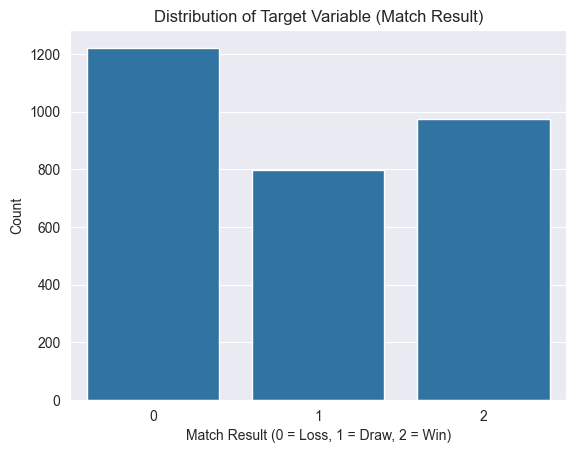

In [30]:
# Plot the distribution of the target variable
sns.countplot(x='target', data=matches_cleaned)
plt.title('Distribution of Target Variable (Match Result)')
plt.xlabel('Match Result (0 = Loss, 1 = Draw, 2 = Win)')
plt.ylabel('Count')
plt.show()

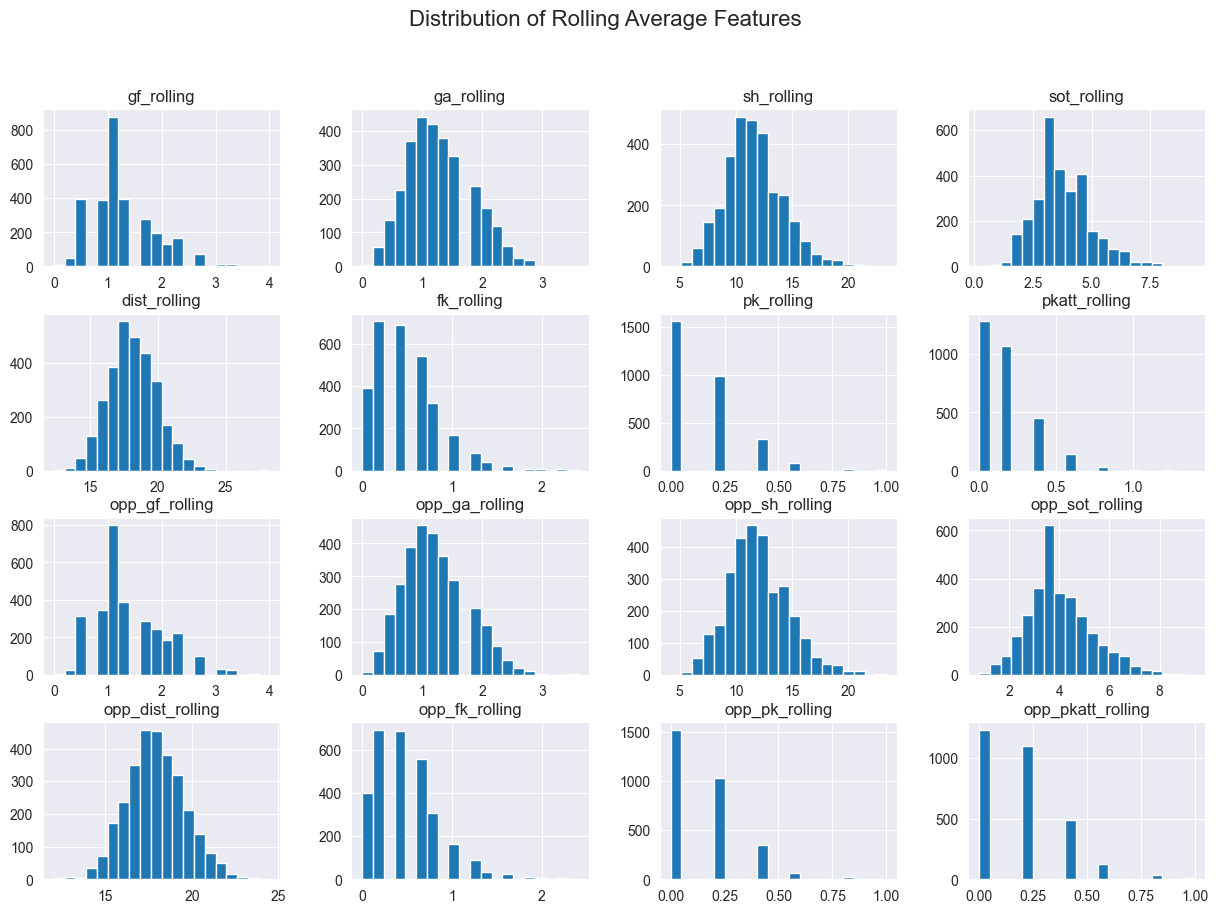

In [31]:
# Plot histograms for numerical columns
numeric_cols = ['gf_rolling', 'ga_rolling', 'sh_rolling', 'sot_rolling',
                'dist_rolling', 'fk_rolling', 'pk_rolling', 'pkatt_rolling',
                'opp_gf_rolling', 'opp_ga_rolling', 'opp_sh_rolling',
                'opp_sot_rolling', 'opp_dist_rolling', 'opp_fk_rolling',
                'opp_pk_rolling', 'opp_pkatt_rolling']

matches_cleaned[numeric_cols].hist(figsize=(15, 10), bins=20, layout=(4, 4))
plt.suptitle('Distribution of Rolling Average Features', fontsize=16)
plt.show()

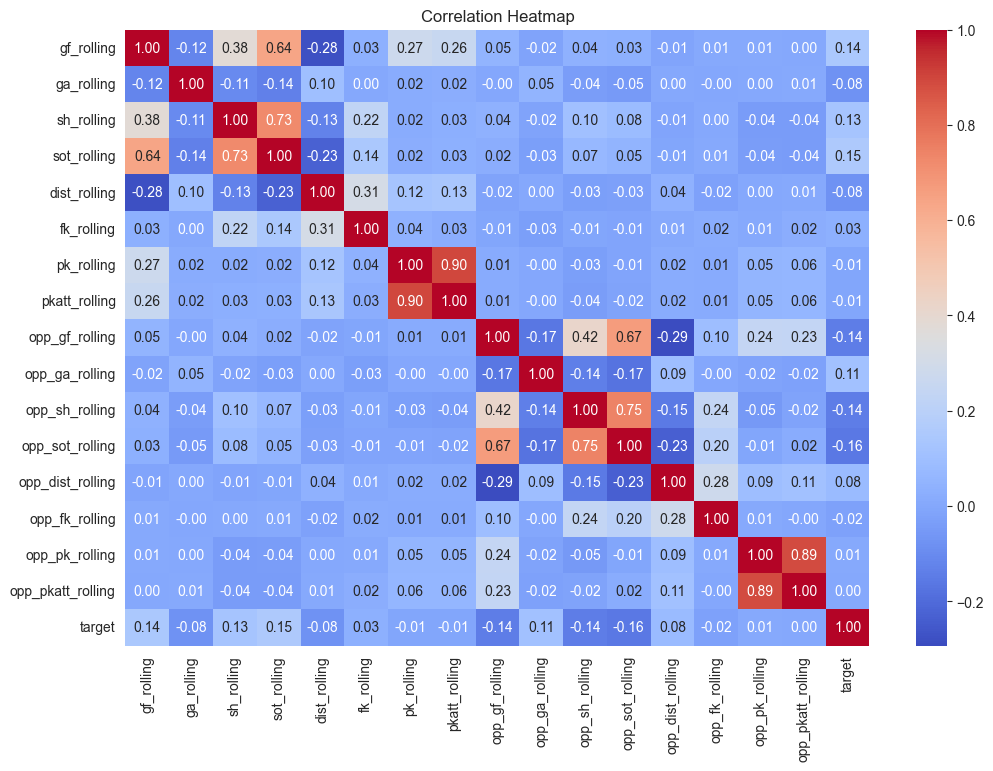

In [32]:
# Compute correlation matrix
corr_matrix = matches_cleaned[numeric_cols + ['target']].corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

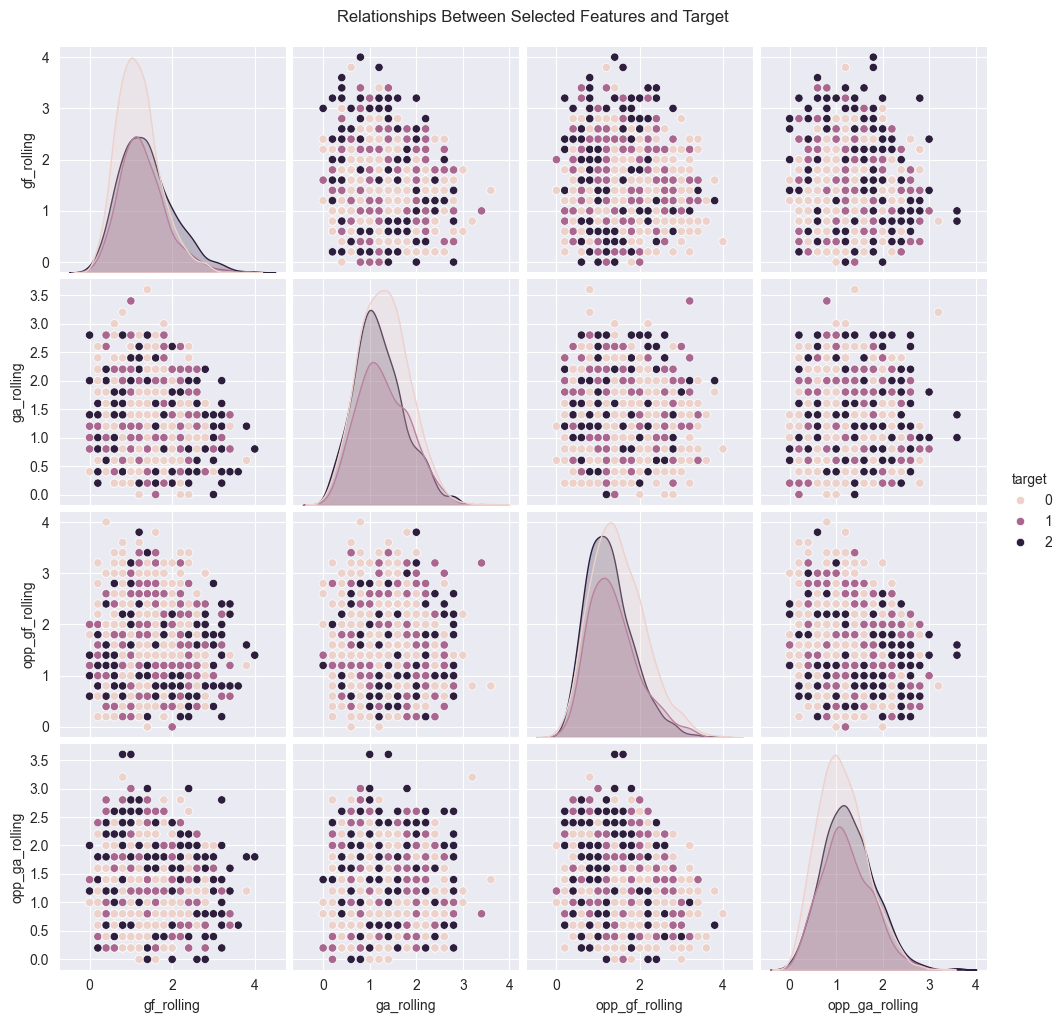

In [33]:
# Pairplot for some selected features and target
selected_features = ['gf_rolling', 'ga_rolling', 'opp_gf_rolling', 'opp_ga_rolling', 'target']
sns.pairplot(matches_cleaned[selected_features], hue='target', diag_kind='kde')
plt.suptitle('Relationships Between Selected Features and Target', y=1.02)
plt.show()

Top-performing teams:


,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling,opp_gf_rolling,opp_ga_rolling,opp_sh_rolling,opp_sot_rolling,opp_dist_rolling,opp_fk_rolling,opp_pk_rolling,opp_pkatt_rolling,target
team,,,,,,,,,,,,,,,,,
4,2.119463,0.947651,14.425503,5.573154,17.076242,0.841611,0.138255,0.178523,1.395973,1.138255,12.065772,4.009396,17.811007,0.457718,0.144966,0.185235,1.510067
21,1.940000,0.877143,15.594286,5.694286,18.022857,0.557143,0.205714,0.240000,1.405714,1.111429,11.788571,4.008571,17.859000,0.448571,0.128571,0.158571,1.507143
3,1.637762,0.826573,12.325874,4.423776,17.241678,0.317483,0.097902,0.128671,1.373427,1.225175,11.967832,4.081119,17.963916,0.502098,0.155245,0.202797,1.342657
2,1.247619,1.027211,11.646259,3.699320,17.321361,0.292517,0.129252,0.185034,1.364626,1.198639,11.744218,4.058503,17.942449,0.462585,0.146939,0.185034,0.993197
22,1.315646,1.031293,11.438095,3.869388,17.749660,0.451701,0.142857,0.180952,1.351020,1.182313,11.893878,4.032653,18.079048,0.458503,0.136054,0.186395,0.993197
23,1.385507,1.104348,12.466667,4.011594,17.592464,0.346377,0.115942,0.133333,1.418841,1.215942,11.988406,4.102899,17.804928,0.452174,0.149275,0.195652,0.971014
20,1.328662,1.252229,12.238217,4.105732,18.315414,0.542675,0.151592,0.188535,1.370701,1.141401,12.323567,4.112102,18.194904,0.500637,0.126115,0.171975,0.961783
26,1.564626,1.288435,12.204082,4.330612,16.986122,0.319728,0.156463,0.210884,1.376871,1.253061,12.110204,4.014966,18.074694,0.512925,0.130612,0.159184,0.959184
11,1.641860,1.334884,11.372093,4.109302,17.306047,0.286047,0.202326,0.218605,1.367442,1.290698,12.025581,4.169767,17.747209,0.400000,0.102326,0.141860,0.953488


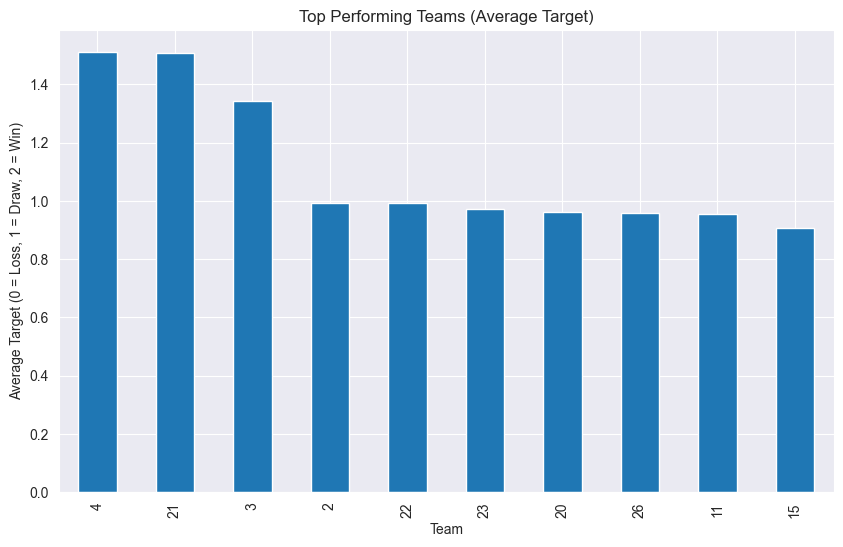

In [34]:
# Group by team to calculate average performance
team_performance = matches_cleaned.groupby('team')[numeric_cols + ['target']].mean()

# Top-performing teams by average target
top_teams = team_performance.sort_values('target', ascending=False).head(10)
print("Top-performing teams:")
display(top_teams)

# Plot average target by team
top_teams['target'].plot(kind='bar', figsize=(10, 6))
plt.title('Top Performing Teams (Average Target)')
plt.ylabel('Average Target (0 = Loss, 1 = Draw, 2 = Win)')
plt.xlabel('Team')
plt.show()

Toughest opponents:


,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling,opp_gf_rolling,opp_ga_rolling,opp_sh_rolling,opp_sot_rolling,opp_dist_rolling,opp_fk_rolling,opp_pk_rolling,opp_pkatt_rolling,target
opp_code,,,,,,,,,,,,,,,,,
12,1.090909,1.618182,10.290909,3.127273,18.498182,0.563636,0.127273,0.163636,0.963636,2.018182,11.109091,3.418182,17.972727,0.327273,0.090909,0.218182,0.454545
21,1.295436,1.189212,11.547718,3.807469,18.127137,0.465560,0.137759,0.178423,1.944398,0.848963,15.543568,5.629876,18.112946,0.561826,0.192531,0.237344,0.481328
4,1.282500,1.229167,11.629167,3.775833,18.171417,0.465000,0.144167,0.183333,2.139167,0.945833,14.503333,5.612500,17.074917,0.841667,0.134167,0.175833,0.500000
3,1.296266,1.256432,11.643983,3.892116,18.136680,0.501245,0.140249,0.184232,1.667220,0.859751,12.307884,4.455602,17.243320,0.312033,0.102905,0.131950,0.568465
15,1.650000,0.800000,10.950000,3.550000,19.115000,0.450000,0.200000,0.200000,1.100000,1.550000,8.050000,2.750000,21.590000,0.750000,0.200000,0.200000,0.750000
23,1.299153,1.243220,11.642373,3.819492,18.102458,0.460169,0.148305,0.187288,1.368644,1.125424,12.450847,3.968644,17.600593,0.366949,0.112712,0.129661,0.860169
5,1.193103,1.320690,11.327586,3.662069,18.479310,0.489655,0.106897,0.137931,0.855172,1.355172,9.772414,2.862069,18.362069,0.410345,0.106897,0.144828,0.879310
22,1.296970,1.292641,11.683117,3.902165,18.181905,0.464069,0.135931,0.181818,1.301299,1.032035,11.492641,3.847619,17.725628,0.458874,0.150649,0.187879,0.883117
26,1.259414,1.292887,11.619247,3.780753,18.277992,0.488703,0.126360,0.161506,1.604184,1.288703,12.271967,4.333054,17.031967,0.328033,0.171548,0.225941,0.907950


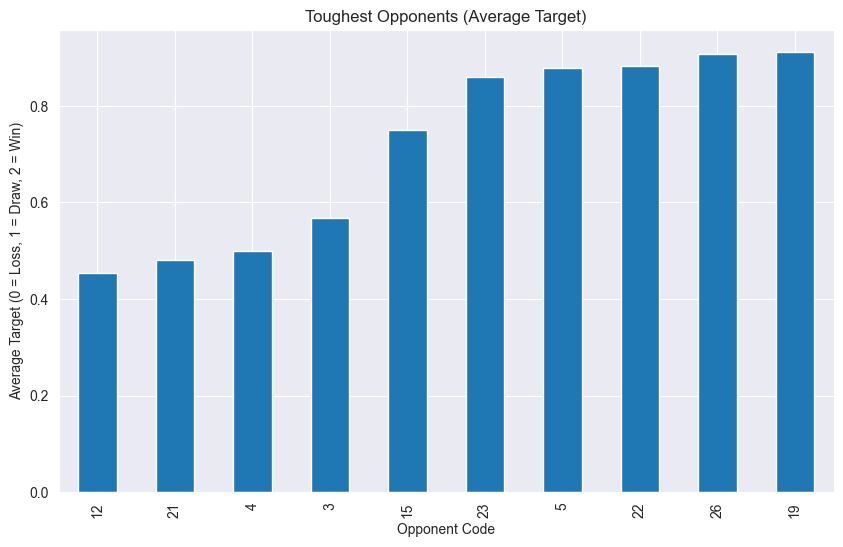

In [35]:
# Group by opponent to calculate average performance
opponent_performance = matches_cleaned.groupby('opp_code')[numeric_cols + ['target']].mean()

# Toughest opponents (lowest average target)
tough_opponents = opponent_performance.sort_values('target').head(10)
print("Toughest opponents:")
display(tough_opponents)

# Plot average target against top opponents
tough_opponents['target'].plot(kind='bar', figsize=(10, 6))
plt.title('Toughest Opponents (Average Target)')
plt.ylabel('Average Target (0 = Loss, 1 = Draw, 2 = Win)')
plt.xlabel('Opponent Code')
plt.show()

In [36]:
# Save the cleaned dataset to a CSV file
output_file_path = "../data/cleaned_laliga_matches.csv"  # Replace with your desired path and filename
matches_cleaned.to_csv(output_file_path, index=False)

print(f"Cleaned dataset saved to {output_file_path}")

Cleaned dataset saved to ../data/cleaned_laliga_matches.csv
